In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing_raw = pd.read_csv(
    "../Data/housing_data.csv",
    parse_dates=["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"})

In [3]:
ca_housing = (
    housing_raw
    .loc[(housing_raw["region_name"].str.contains("CA"))]
    .assign(region_name = housing_raw["region_name"].str[0:-11])
)

In [4]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


In [5]:
ca_housing_pivot = (
    ca_housing
    .pivot_table(
        index="period_begin",
        columns = "region_name",
        values = "median_active_list_price"
    )
    .assign(CA_average = lambda x: x.mean(axis=1))
    .loc[:, ["Los Angeles", "San Diego", "San Francisco", "CA_average"]]
)

ca_housing_pivot.head()

region_name,Los Angeles,San Diego,San Francisco,CA_average
period_begin,,,,
2017-01-02,611561.0,618570.8,1229018.7,492258.437736
2017-01-09,614061.0,621737.5,1233393.7,493710.639623
2017-01-16,617311.0,625820.8,1239977.0,495369.416981
2017-01-23,620644.3,629491.6,1247977.0,497191.662264
2017-01-30,624541.6,632824.0,1253310.4,499286.207547


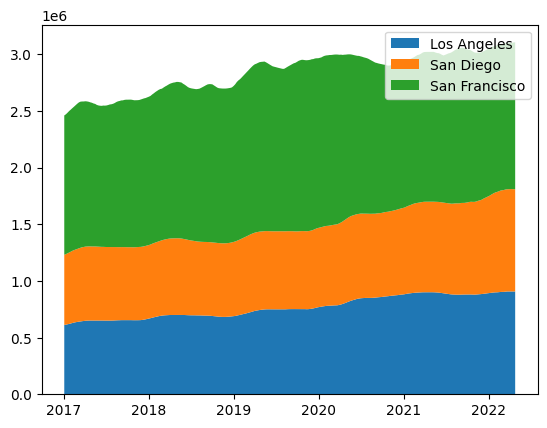

In [7]:
fig, ax = plt.subplots()

# labels = ca_housing_pivot.columns
# colors = ["grey", "green", "pink"]

ax.stackplot(
    ca_housing_pivot.index,
    ca_housing_pivot["Los Angeles"],
    ca_housing_pivot["San Diego"],
    ca_housing_pivot["San Francisco"],
        # labels=labels,
        # colors=colors
)

ax.legend(ca_housing_pivot.columns)

In [8]:
ca_housing_pivot = (
    ca_housing
    .pivot_table(
        index="period_begin",
        columns = "region_name",
        values = "inventory"
    )
    .assign(CA_average = lambda x: x.mean(axis=1))
    .loc[:, ["Los Angeles", "San Diego", "San Francisco", "CA_average"]]
)

ca_housing_pivot.head()

region_name,Los Angeles,San Diego,San Francisco,CA_average
period_begin,,,,
2017-01-02,15492.0,5468.0,626.0,1259.851852
2017-01-09,15605.0,5493.0,652.0,1268.888889
2017-01-16,15724.0,5520.0,673.0,1278.481481
2017-01-23,15834.0,5546.0,685.0,1287.129630
2017-01-30,15972.0,5581.0,697.0,1298.148148


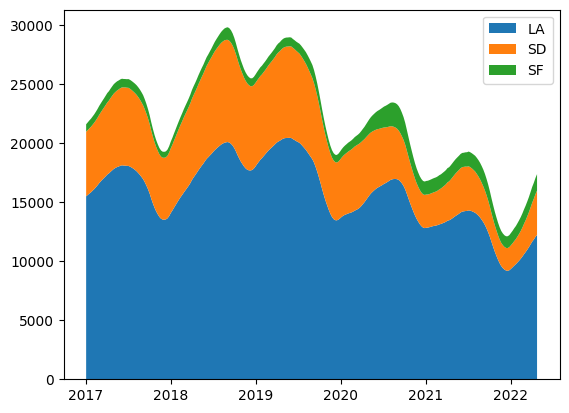

In [13]:
fig, ax = plt.subplots()

labels = ["LA", "SD", "SF"]
# colors = ["grey", "green", "pink"]

ax.stackplot(
    ca_housing_pivot.index,
    ca_housing_pivot["Los Angeles"],
    ca_housing_pivot["San Diego"],
    ca_housing_pivot["San Francisco"],
    labels=labels,
    # colors=colors
)

ax.legend()